# Setting

https://xgboost.readthedocs.io/en/stable/R-package/xgboostPresentation.html

In [1]:
#install.packages("xgboost")

also installing the dependency ‘data.table’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [1]:
library(xgboost)

# Ex1

In [3]:
# load data
data(agaricus.train, package='xgboost')
data(agaricus.test, package='xgboost')
train <- agaricus.train
test <- agaricus.test
# fit model
bst <- xgboost(data = train$data, label = train$label, max.depth = 2, eta = 1, nrounds = 2,
               nthread = 2, objective = "binary:logistic")
# predict
pred <- predict(bst, test$data)

[1]	train-logloss:0.233376 
[2]	train-logloss:0.136658 


In [5]:
str(pred)

 num [1:1611] 0.2858 0.9239 0.2858 0.2858 0.0517 ...


In [6]:
str(train)

List of 2
 $ data :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:143286] 2 6 8 11 18 20 21 24 28 32 ...
  .. ..@ p       : int [1:127] 0 369 372 3306 5845 6489 6513 8380 8384 10991 ...
  .. ..@ Dim     : int [1:2] 6513 126
  .. ..@ Dimnames:List of 2
  .. .. ..$ : NULL
  .. .. ..$ : chr [1:126] "cap-shape=bell" "cap-shape=conical" "cap-shape=convex" "cap-shape=flat" ...
  .. ..@ x       : num [1:143286] 1 1 1 1 1 1 1 1 1 1 ...
  .. ..@ factors : list()
 $ label: num [1:6513] 1 0 0 1 0 0 0 1 0 0 ...


In [7]:
str(test$data)

Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  ..@ i       : int [1:35442] 0 2 7 11 13 16 20 22 27 31 ...
  ..@ p       : int [1:127] 0 83 84 806 1419 1603 1611 2064 2064 2701 ...
  ..@ Dim     : int [1:2] 1611 126
  ..@ Dimnames:List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:126] "cap-shape=bell" "cap-shape=conical" "cap-shape=convex" "cap-shape=flat" ...
  ..@ x       : num [1:35442] 1 1 1 1 1 1 1 1 1 1 ...
  ..@ factors : list()


# Ex2

In [ ]:
#cars_19 data set
#extreme gradient boosting

#raw data
#https://www.fueleconomy.gov/feg/epadata/19data.zip

library(xgboost)
library(caret)
library(dummies)
library(DiagrammeR)

## cars_19 data set
- https://www.r-bloggers.com/2020/11/r-xgboost-regression/

In [9]:
load("cars_19.csv")

Warning message:
“file ‘cars_19.csv’ has magic number 'Model'
  Use of save versions prior to 2 is deprecated”


ERROR: Error in load("cars_19.csv"): bad restore file magic number (file may be corrupted) -- no data loaded


In [11]:
library(e1071)

ERROR: Error in library(e1071): there is no package called ‘e1071’


In [ ]:
title <- "extreme gradient boosting"

tmp <- cars_19[, c(4, 6, 7, 9:12)]
tmp1 <- dummy.data.frame(tmp)
d <- data.frame(cars_19[, c(1:3, 5, 8)], tmp1)
m <- as.matrix(d)

set.seed(123)
indices <- sample(1:nrow(cars_19), size = 0.75 * nrow(cars_19))
train <- m[indices,]
test <- m[-indices,]

m1_xgb <-
  xgboost(
    data = train[, 2:34],
    label = train[, 1],
    nrounds = 1000,
    objective = "reg:squarederror",
    early_stopping_rounds = 3,
    max_depth = 6,
    eta = .25
  )

pred_xgb <- predict(m1_xgb, test[, 2:34])

yhat <- pred_xgb
y <- test[, 1]
postResample(yhat, y)

r <- y - yhat
plot(r, ylab = "residuals", main = title)

plot(y,
     yhat,
     xlab = "actual",
     ylab = "predicted",
     main = title)
abline(lm(yhat ~ y))

#plot first 3 trees of model
xgb.plot.tree(model = m1_xgb, trees = 0:2)

importance_matrix <- xgb.importance(model = m1_xgb)
xgb.plot.importance(importance_matrix, xlab = "Feature Importance")

#RMSE      Rsquared   MAE
#1.7374    0.8998     1.231

In [ ]:
#################
#grid search
#create hyperparameter grid
hyper_grid <- expand.grid(max_depth = seq(3, 6, 1),
                          eta = seq(.2, .35, .01))
xgb_train_rmse <- NULL
xgb_test_rmse <- NULL

for (j in 1:nrow(hyper_grid)) {
  set.seed(123)
  m_xgb_untuned <- xgb.cv(
    data = train[, 2:34],
    label = train[, 1],
    nrounds = 1000,
    objective = "reg:squarederror",
    early_stopping_rounds = 3,
    nfold = 5,
    max_depth = hyper_grid$max_depth[j],
    eta = hyper_grid$eta[j]
  )
  
  xgb_train_rmse[j] <- m_xgb_untuned$evaluation_log$train_rmse_mean[m_xgb_untuned$best_iteration]
  xgb_test_rmse[j] <- m_xgb_untuned$evaluation_log$test_rmse_mean[m_xgb_untuned$best_iteration]
  
  cat(j, "\n")
}

#ideal hyperparamters
hyper_grid[which.min(xgb_test_rmse), ]

#max_depth  eta
#6         0.25 

- https://github.com/dmlc/xgboost/blob/master/R-package/demo/cross_validation.R
- https://github.com/dmlc/xgboost/blob/master/R-package/demo/custom_objective.R

# Ex3

## Setting

In [2]:
library(quantmod)
#library(forecast)
#library(rugarch)


#library(lattice)
#library(timeSeries)


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [3]:
train_start <- '1991-01-01'
train_end <- '2019-12-31'

test_start <- '2020-01-01'
test_end <- '2020-12-31'

In [4]:
from <- train_start
to <- test_end
getSymbols("^GSPC", from=from, to=to)

[1] "^GSPC"

In [5]:
spx <- GSPC
colnames(spx) <- c('o','h','l','c','v','a')

In [6]:
# daily log. return
spx.ret <- diff(log(spx$a))
colnames(spx.ret) <- 'logret'

In [7]:
YEAR <- 252
hori <- 21
peri <- floor(hori/2)
#wind <- 5*YEAR
wind <- 7*YEAR

In [8]:
# testing
train_start <- '1991-01-01'
#train_end <- '2000-12-31'
train_end <- '1998-12-31'
train <- window(spx.ret, start=as.Date(train_start), end=as.Date(train_end))

In [9]:
dim(train)

[1] 2023    1

In [12]:
train.ml <- merge(lag(train, -1), train, join='left', fill=NA)

x <- RSI(spx$a)
train.ml <- merge(train.ml, x, join='left', fill=NA)

# use close instead of adjusted to make consistent with "un-adjusted" high & low
x <- BBands(spx[,c('h','l','c')])
x <- x$pctB
train.ml <- merge(train.ml, x, join='left', fill=NA)

x <- MACD(spx$a)
x <- x$macd - x$signal
train.ml <- merge(train.ml, x, join='left', fill=NA)

colnames(train.ml) <- c('logret_fwd', 'logret', 'rsi','bbands','macd')
train.ml <- na.omit(train.ml)
head(train.ml)
tail(train.ml)

              logret_fwd        logret      rsi    bbands        macd
1991-02-19 -0.0115721543  0.0008938101 72.59254 0.8419486 -0.03641515
1991-02-20 -0.0004657216 -0.0115721543 66.25313 0.7706927 -0.18551057
1991-02-21  0.0018614141 -0.0004657216 66.00481 0.7330987 -0.30953562
1991-02-22  0.0043934960  0.0018614141 66.54491 0.7402938 -0.39546732
1991-02-25 -0.0121907956  0.0043934960 67.84742 0.7305630 -0.43573971
1991-02-26  0.0134968638 -0.0121907956 60.80133 0.6379610 -0.55105032

              logret_fwd        logret      rsi    bbands         macd
1998-12-22  0.0205344089  0.0006066963 64.03384 0.9710755 -0.003522569
1998-12-23 -0.0018494463  0.0205344089 69.31506 1.1362226  0.180147518
1998-12-24 -0.0006363021 -0.0018494463 68.33272 1.0891085  0.259187825
1998-12-28  0.0132292844 -0.0006363021 67.97622 0.9989878  0.276423285
1998-12-29 -0.0079879511  0.0132292844 71.34467 1.0004403  0.344477610
1998-12-30 -0.0021941483 -0.0079879511 66.76606 0.9423269  0.300619993

In [15]:
x.train <- train.ml[1:wind, ]
x.test <- train.ml[(wind+1):(wind+hori), ]

In [16]:
tail(x.train)
tail(x.test)

              logret_fwd        logret      rsi    bbands      macd
1998-02-02  0.0047128575  0.0211862185 64.31151 1.0077123 0.3841329
1998-02-03  0.0008942561  0.0047128575 65.63865 1.0476494 0.4696863
1998-02-04 -0.0033426007  0.0008942561 65.89851 0.9944159 0.4988247
1998-02-05  0.0088493077 -0.0033426007 63.95399 0.9339544 0.4625227
1998-02-06 -0.0017003088  0.0088493077 66.75831 0.9176886 0.4657009
1998-02-09  0.0081488516 -0.0017003088 65.69693 0.8902353 0.4234937

             logret_fwd       logret      rsi    bbands          macd
1998-03-04 -0.011794244 -0.004468118 67.95713 0.8269401  0.0006194371
1998-03-05  0.019744744 -0.011794244 58.40712 0.6418364 -0.1262929284
1998-03-06 -0.003206722  0.019744744 66.84162 0.8200728 -0.0876617586
1998-03-09  0.011282522 -0.003206722 64.53378 0.8787179 -0.0951011368
1998-03-10  0.003957366  0.011282522 68.65153 0.9631706 -0.0369398271
1998-03-11  0.001356229  0.003957366 69.97824 1.0174471  0.0117336704

## Regression

In [18]:
m1_xgb <-
  xgboost(
    data = x.train[, 2:5],
    label = x.train[, 1],
    nrounds = 1000,
    objective = "reg:squarederror",
    early_stopping_rounds = 3,
    max_depth = 6,
    eta = .25
  )

pred_xgb <- predict(m1_xgb, x.test[, 2:5])

[1]	train-rmse:0.374714 
Will train until train_rmse hasn't improved in 3 rounds.

[2]	train-rmse:0.281132 
[3]	train-rmse:0.210946 
[4]	train-rmse:0.158317 
[5]	train-rmse:0.118863 
[6]	train-rmse:0.089300 
[7]	train-rmse:0.067167 
[8]	train-rmse:0.050622 
[9]	train-rmse:0.038286 
[10]	train-rmse:0.029131 
[11]	train-rmse:0.022385 
[12]	train-rmse:0.017463 
[13]	train-rmse:0.013929 
[14]	train-rmse:0.011434 
[15]	train-rmse:0.009667 
[16]	train-rmse:0.008457 
[17]	train-rmse:0.007657 
[18]	train-rmse:0.007143 
[19]	train-rmse:0.006783 
[20]	train-rmse:0.006509 
[21]	train-rmse:0.006354 
[22]	train-rmse:0.006224 
[23]	train-rmse:0.006121 
[24]	train-rmse:0.006059 
[25]	train-rmse:0.006011 
[26]	train-rmse:0.005975 
[27]	train-rmse:0.005908 
[28]	train-rmse:0.005875 
[29]	train-rmse:0.005790 
[30]	train-rmse:0.005707 
[31]	train-rmse:0.005574 
[32]	train-rmse:0.005518 
[33]	train-rmse:0.005481 
[34]	train-rmse:0.005467 
[35]	train-rmse:0.005421 
[36]	train-rmse:0.005353 
[37]	train-rmse

In [19]:
# data is xts
head(pred_xgb)

[1] -0.0003728835  0.0009834707 -0.0050283307 -0.0061360137  0.0005706571
[6]  0.0029925352

In [20]:
str(pred_xgb)

 num [1:21] -0.000373 0.000983 -0.005028 -0.006136 0.000571 ...


In [37]:
library(caret)

ERROR: Error in library(caret): there is no package called ‘caret’


In [21]:
yhat <- pred_xgb
y <- x.test[, 1]
postResample(yhat, y)

ERROR: Error in postResample(yhat, y): could not find function "postResample"


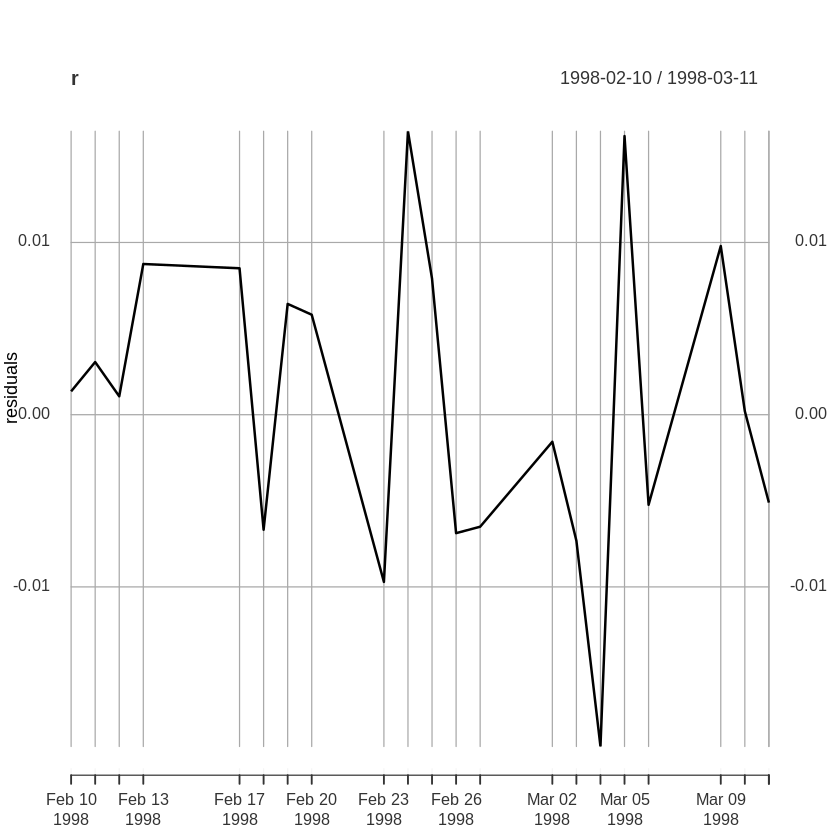

In [22]:
r <- y - yhat
#plot(r, ylab = "residuals", main = title)
plot(r, ylab = "residuals")

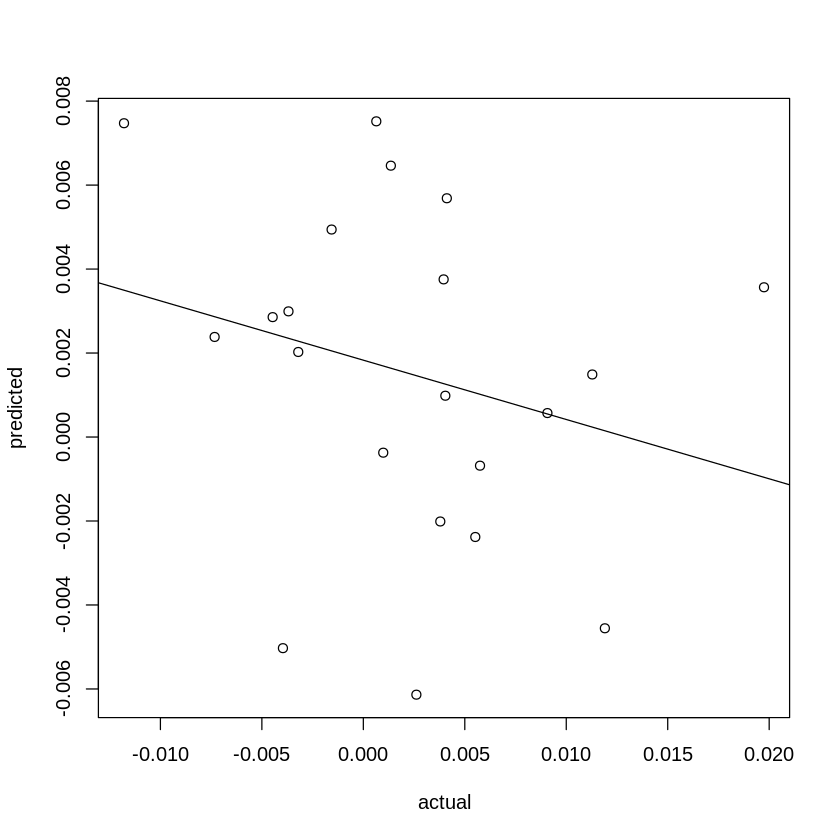

In [23]:
plot(as.numeric(y),
     yhat,
     xlab = "actual",
     ylab = "predicted"
     #main = title
    )
abline(lm(yhat ~ y))

In [24]:
#plot first 3 trees of model
xgb.plot.tree(model = m1_xgb, trees = 0:2)

ERROR: Error: DiagrammeR package is required for xgb.plot.tree


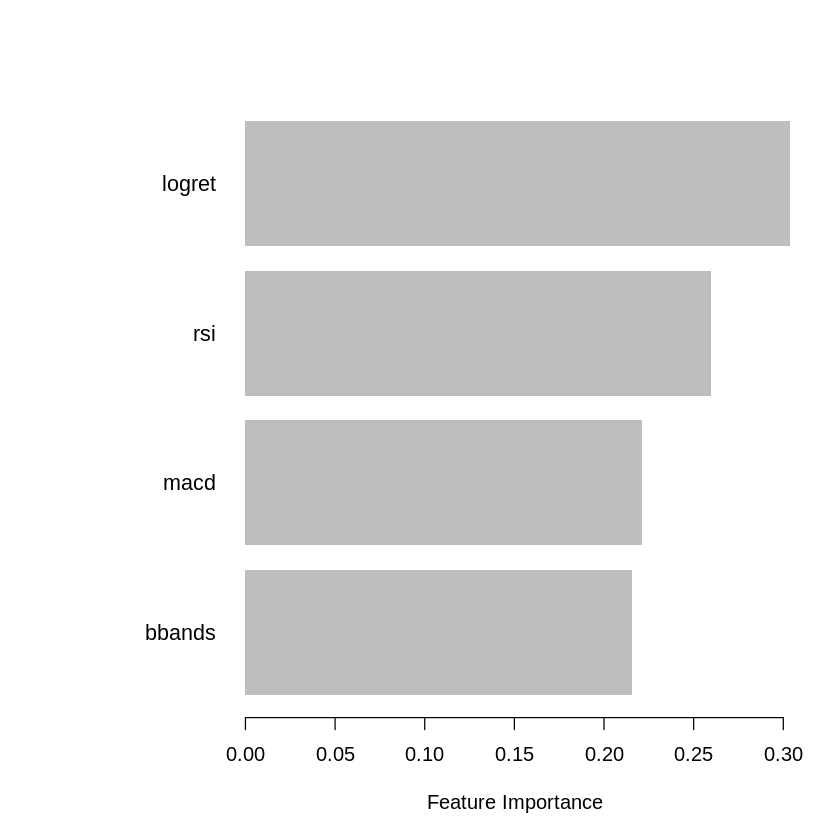

In [25]:
importance_matrix <- xgb.importance(model = m1_xgb)
xgb.plot.importance(importance_matrix, xlab = "Feature Importance")

## tuning hyperparams

In [ ]:
require(xgboost)
# load in the agaricus dataset
data(agaricus.train, package = 'xgboost')
data(agaricus.test, package = 'xgboost')
dtrain <- xgb.DMatrix(agaricus.train$data, label = agaricus.train$label)
dtest <- xgb.DMatrix(agaricus.test$data, label = agaricus.test$label)

nrounds <- 2
param <- list(max_depth = 2, eta = 1, nthread = 2, objective = 'binary:logistic')

cat('running cross validation\n')
# do cross validation, this will print result out as
# [iteration]  metric_name:mean_value+std_value
# std_value is standard deviation of the metric
xgb.cv(param, dtrain, nrounds, nfold = 5, metrics = {'error'})

cat('running cross validation, disable standard deviation display\n')
# do cross validation, this will print result out as
# [iteration]  metric_name:mean_value+std_value
# std_value is standard deviation of the metric
xgb.cv(param, dtrain, nrounds, nfold = 5,
       metrics = 'error', showsd = FALSE)

In [ ]:
###
# you can also do cross validation with customized loss function
# See custom_objective.R
##
print ('running cross validation, with customized loss function')

logregobj <- function(preds, dtrain) {
  labels <- getinfo(dtrain, "label")
  preds <- 1 / (1 + exp(-preds))
  grad <- preds - labels
  hess <- preds * (1 - preds)
  return(list(grad = grad, hess = hess))
}
evalerror <- function(preds, dtrain) {
  labels <- getinfo(dtrain, "label")
  err <- as.numeric(sum(labels != (preds > 0))) / length(labels)
  return(list(metric = "error", value = err))
}

param <- list(max_depth = 2, eta = 1,
              objective = logregobj, eval_metric = evalerror)
# train with customized objective
xgb.cv(params = param, data = dtrain, nrounds = nrounds, nfold = 5)

# do cross validation with prediction values for each fold
res <- xgb.cv(params = param, data = dtrain, nrounds = nrounds, nfold = 5, prediction = TRUE)
res$evaluation_log
length(res$pred)

In [54]:
#create hyperparameter grid
hyper_grid <- expand.grid(max_depth = seq(3, 6, 1), eta = seq(.2, .35, .01))  
head(hyper_grid)

,max_depth,eta
,<dbl>,<dbl>
1,3,0.20
2,4,0.20
3,5,0.20
4,6,0.20
5,3,0.21
6,4,0.21


In [58]:
param <- list(max_depth = seq(3, 6, 1), eta = seq(.2, .35, .01)
#              objective = logregobj, eval_metric = evalerror
             )
head(param)

$max_depth
[1] 3 4 5 6

$eta
 [1] 0.20 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.30 0.31 0.32 0.33 0.34
[16] 0.35

In [66]:
data(agaricus.train, package='xgboost')
dtrain <- with(agaricus.train, xgb.DMatrix(data, label = label))
cv <- xgb.cv(data = dtrain, nrounds = 3, nthread = 2, nfold = 5, metrics = list("rmse","auc"),
                  max_depth = 3, eta = 1, objective = "binary:logistic")

[1]	train-rmse:0.162421+0.002319	train-auc:0.987112+0.000939	test-rmse:0.162321+0.007896	test-auc:0.987115+0.003776 
[2]	train-rmse:0.075310+0.004027	train-auc:0.999793+0.000311	test-rmse:0.079772+0.011197	test-auc:0.999269+0.001394 
[3]	train-rmse:0.038028+0.003009	train-auc:0.999986+0.000022	test-rmse:0.042312+0.008805	test-auc:0.999971+0.000038 


In [67]:
print(cv)
print(cv, verbose=TRUE)

##### xgb.cv 5-folds
 iter train_rmse_mean train_rmse_std train_auc_mean train_auc_std
    1      0.16242081    0.002319358      0.9871120  9.392904e-04
    2      0.07531024    0.004026572      0.9997934  3.108307e-04
    3      0.03802797    0.003008771      0.9999857  2.210734e-05
 test_rmse_mean test_rmse_std test_auc_mean test_auc_std
     0.16232096   0.007895914     0.9871149 3.775906e-03
     0.07977151   0.011196582     0.9992690 1.394480e-03
     0.04231151   0.008804759     0.9999707 3.831913e-05
##### xgb.cv 5-folds
call:
  xgb.cv(data = dtrain, nrounds = 3, nfold = 5, metrics = list("rmse", 
    "auc"), nthread = 2, max_depth = 3, eta = 1, objective = "binary:logistic")
params (as set within xgb.cv):
  nthread = "2", max_depth = "3", eta = "1", objective = "binary:logistic", eval_metric = "rmse", eval_metric = "auc", silent = "1"
callbacks:
  cb.print.evaluation(period = print_every_n, showsd = showsd)
  cb.evaluation.log()
niter: 3
evaluation_log:
 iter train_rmse_mean tr

# Ex4

## Settings

In [21]:
library(quantmod)

In [5]:
path <- '~/works/ts/lib'
source(paste(path, "myutils.r", sep='/'))
source(paste(path, "myarimagarch.r", sep='/'))

In [6]:
source(paste(path, "myxgb.r", sep='/'))

## Data

In [22]:
train_start <- '1991-01-01'
train_end <- '2019-12-31'

test_start <- '2020-01-01'
test_end <- '2020-12-31'

In [23]:
from <- train_start
to <- test_end
getSymbols("^GSPC", from=from, to=to)

[1] "^GSPC"

In [24]:
spx <- GSPC
colnames(spx) <- c('o','h','l','c','v','a')

### Return

In [32]:
lookahead <- 21

In [33]:
spx.ret <- diff(log(spx$a), lookahead)
spx.ret <- na.omit(spx.ret)
colnames(spx.ret) <- 'logret'
head(spx.ret)

               logret
1991-01-31 0.05216129
1991-02-01 0.06360416
1991-02-04 0.08173788
1991-02-05 0.10755822
1991-02-06 0.12847341
1991-02-07 0.13502311

In [34]:
train <- window(spx.ret, end=as.Date(train_end))
test <- window(spx.ret, start=as.Date(test_start), end=as.Date(test_end))

### CV Settings

In [28]:
YEAR <- 252

#hori <- floor(YEAR/2)
#hori <- floor(YEAR/6)
hori <- floor(YEAR/12)

#peri <- floor(hori/2)
#peri <- hori*2
peri <- hori

#wind <- 5*YEAR
#wind <- 7*YEAR
wind <- 9*YEAR

In [29]:
max_depth <- seq(4, 8, 1)
eta <- c(0.01, 0.05, 0.1, 0.2, 0.3)

### Regressors

In [14]:
x <- RSI(spx$a)
trainx <- merge(train, x, join='left', fill=NA)

In [15]:
# use close instead of adjusted to make consistent with "un-adjusted" high & low
x <- BBands(spx[,c('h','l','c')])
x <- x$pctB
trainx <- merge(trainx, x, join='left', fill=NA)

In [16]:
x <- MACD(spx$a)
x <- x$macd - x$signal
trainx <- merge(trainx, x, join='left', fill=NA)

In [17]:
colnames(trainx) <- c('y','rsi','bbands','macd')
trainx <- na.omit(trainx)
head(trainx)
tail(trainx)

                    y      rsi    bbands        macd
1991-02-19 0.10602550 72.59254 0.8419486 -0.03641515
1991-02-20 0.09798126 66.25313 0.7706927 -0.18551057
1991-02-21 0.10585688 66.00481 0.7330987 -0.30953562
1991-02-22 0.10194779 66.54491 0.7402938 -0.39546732
1991-02-25 0.09259647 67.84742 0.7305630 -0.43573971
1991-02-26 0.07655978 60.80133 0.6379610 -0.55105032

                    y      rsi    bbands       macd
2019-12-23 0.03808252 76.15462 0.9680588 0.15430304
2019-12-24 0.03571448 75.83204 0.9028770 0.14089335
2019-12-26 0.03335029 78.41506 0.9189083 0.14916039
2019-12-27 0.03119111 78.43159 0.8946206 0.13732115
2019-12-30 0.02122778 68.77901 0.7837726 0.07574999
2019-12-31 0.02818876 70.74366 0.7500170 0.04243151

### random dataset

In [173]:
set.seed(1)
#set.seed(NULL)

h <- 21

# idx works for gbm as well
idx <- wind:(nrow(trainx)-wind-h-lookahead)
idx <- sample(idx, 1)

idx.train <- idx:(idx+wind-1)
idx.test <- (idx+wind):(idx+wind+h-1)

In [174]:
#h.gbm <- 1
h.gbm <- h

train.ml <- merge(lag.xts(trainx$y, -lookahead), trainx, join='left', fill=NA)
colnames(train.ml) <- c('logret_fwd', 'logret', 'rsi','bbands','macd')
idx.label <- 1
idx.feautres <- 2:5

x.train.ml <- train.ml[idx.train]
x.test.ml <- train.ml[idx.test[1:h.gbm]]

x.train.label <- x.train.ml[,idx.label]
x.train.features <- x.train.ml[,idx.feautres]
x.test.label <- x.test.ml[,idx.label]
x.test.features <- x.test.ml[,idx.feautres]

## Train/Test

In [175]:
fc <- xgb.forecast(x.train.label, x.train.features, x.test.label, x.test.features,
                   max_depth=max_depth, eta=eta)

In [176]:
my.figsize(10, 5)

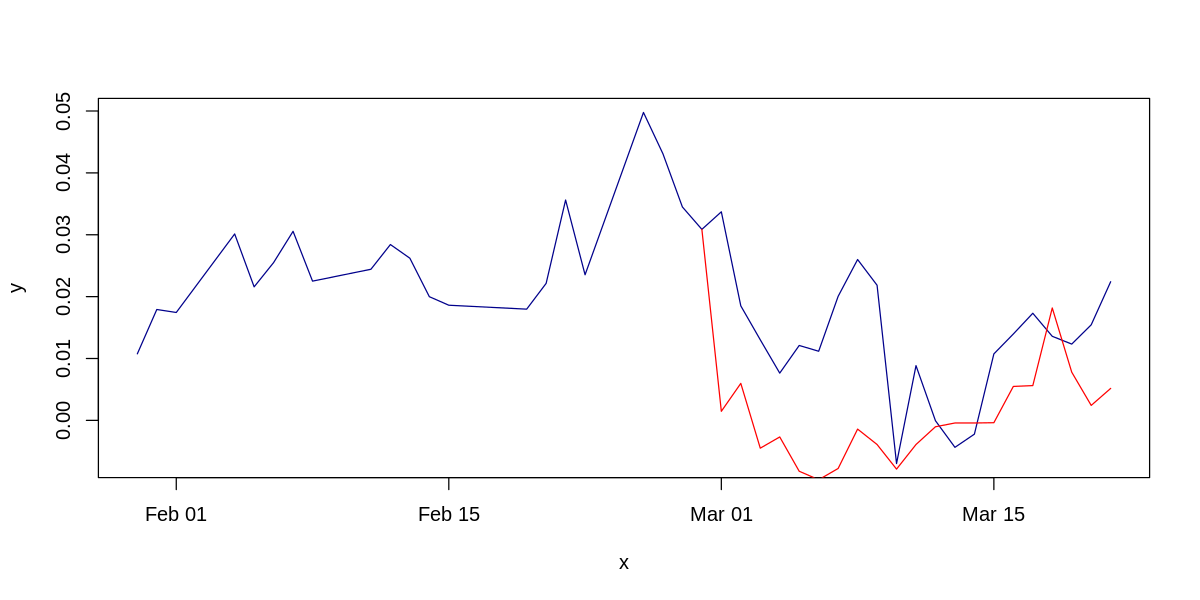

In [177]:
l <- tail(x.train.label, h*1)
x <- index(l)
x <- append(x, tail(x,1)+1:h.gbm)
y <- as.numeric(l)
y <- append(y, as.numeric(x.test.label))
plot(x, y, type='l', col='darkblue')

x <- tail(x, h.gbm+1)
y <- append(tail(as.numeric(l),1), fc$pred)
lines(x, y, col='red')

In [178]:
my.figsize(7, 4)

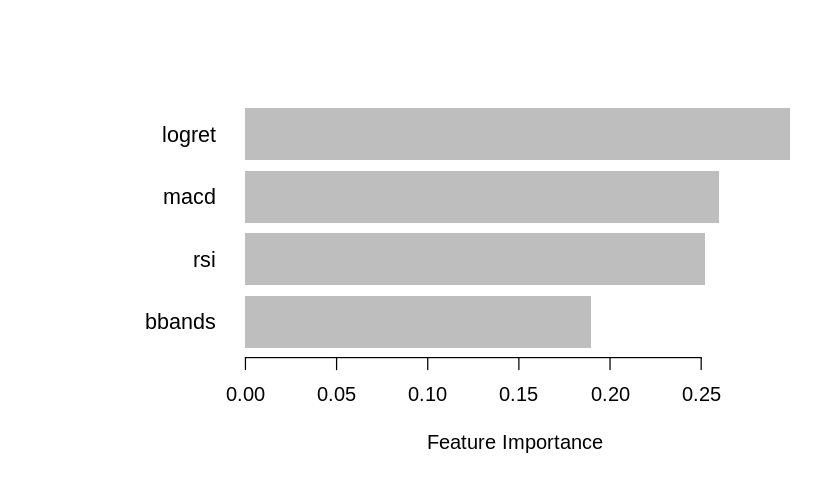

In [179]:
importance_matrix <- xgb.importance(model=fc$model)
xgb.plot.importance(importance_matrix, xlab = "Feature Importance")

## Importance of Feature

In [30]:
calc.indi <- function(n.rsi=14, n.bbands=20, n.macd=c(12,26,9)) {
    x <- RSI(spx$a, n=n.rsi)
    trainx <- merge(train, x, join='left', fill=NA)

    # use close instead of adjusted to make consistent with "un-adjusted" high & low
    x <- BBands(spx[,c('h','l','c')], n=n.bbands)
    x <- x$pctB
    trainx <- merge(trainx, x, join='left', fill=NA)

    x <- MACD(spx$a, nFast = n.macd[1], nSlow = n.macd[2], nSig = n.macd[3])
    x <- x$macd - x$signal
    trainx <- merge(trainx, x, join='left', fill=NA)

    colnames(trainx) <- c('y','rsi','bbands','macd')
    trainx <- na.omit(trainx)
    return(trainx)
}

get.dataset <- function(trainx, lookahead, h=21, seed=NULL) {
    set.seed(seed)

    # idx works for gbm as well
    idx <- wind:(nrow(trainx)-wind-h-lookahead)
    idx <- sample(idx, 1)

    idx.train <- idx:(idx+wind-1)
    idx.test <- (idx+wind):(idx+wind+h-1)

    h.gbm <- h

    train.ml <- merge(lag.xts(trainx$y, -lookahead), trainx, join='left', fill=NA)
    colnames(train.ml) <- c('logret_fwd', 'logret', 'rsi','bbands','macd')
    idx.label <- 1
    idx.feautres <- 2:5

    x.train.ml <- train.ml[idx.train]
    x.test.ml <- train.ml[idx.test[1:h.gbm]]

    x.train.label <- x.train.ml[,idx.label]
    x.train.features <- x.train.ml[,idx.feautres]
    x.test.label <- x.test.ml[,idx.label]
    x.test.features <- x.test.ml[,idx.feautres]
    res <- list(x.train.label=x.train.label,
                x.train.features=x.train.features,
                x.test.label=x.test.label,
                x.test.features=x.test.features)
    return(res)
}

### RSI

In [36]:
#n.rsi <- c(10,14,20,30,40)
#n.rsi <- c(20,30,40,50)
n.rsi <- c(30,35,40,45)
row.ft <- 4

for (n in n.rsi) {
    trainx <- calc.indi(n.rsi=n)
    ds <- get.dataset(trainx, lookahead)

    fc <- xgb.forecast(ds$x.train.label, ds$x.train.features, 
                       ds$x.test.label, ds$x.test.features,
                       max_depth=max_depth, eta=eta)

    importance_matrix <- xgb.importance(model=fc$model)
    importance_matrix <- importance_matrix[order(Feature),]

    i <- importance_matrix[row.ft,2][[1]] # gain as importance
    message(paste('Importance of RSI (n=', n, '): ', round(i,3), sep=''))
}

Importance of RSI (n=30): 0.303



### BBANDS

In [309]:
#n.bbands <- c(16,20,24,28,32)
n.bbands <- c(8,12,16,20,24)
#n.bbands <- c(32,36,40)
row.ft <- 1

for (n in n.bbands) {
    trainx <- calc.indi(n.rsi=40, n.bbands=n)
    ds <- get.dataset(trainx)

    fc <- xgb.forecast(ds$x.train.label, ds$x.train.features, 
                       ds$x.test.label, ds$x.test.features,
                       max_depth=max_depth, eta=eta)

    importance_matrix <- xgb.importance(model=fc$model)
    importance_matrix <- importance_matrix[order(Feature),]

    i <- importance_matrix[row.ft,2][[1]] # gain as importance
    message(paste('Importance of BBands (n=', n, '): ', round(i,3), sep=''))
}

Importance of BBands (n=8): 0.148

Importance of BBands (n=12): 0.181

Importance of BBands (n=16): 0.194

Importance of BBands (n=20): 0.161

Importance of BBands (n=24): 0.14



### MACD

In [310]:
#n.macd <- expand.grid(nFast=c(8, 12, 16), nSlow=c(20, 26, 30), nSig=c(9))
n.macd <- list(c(12,26,9), 
               c(12,30,9), 
               c(12,22,9), 
               c( 8,26,9), 
               c(16,26,9))
row.ft <- 3

In [312]:
for (n in n.macd) {
    trainx <- calc.indi(n.rsi=40, n.bbands=16, n.macd=n)
    ds <- get.dataset(trainx)

    fc <- xgb.forecast(ds$x.train.label, ds$x.train.features, 
                       ds$x.test.label, ds$x.test.features,
                       max_depth=max_depth, eta=eta)

    importance_matrix <- xgb.importance(model=fc$model)
    importance_matrix <- importance_matrix[order(Feature),]

    i <- importance_matrix[row.ft,2][[1]] # gain as importance
    message(paste('Importance of MACD (', paste(n, collapse=', ' ), ') : ', round(i,3), sep=''))
}

Importance of MACD (12, 26, 9) : 0.243

Importance of MACD (12, 30, 9) : 0.225

Importance of MACD (12, 22, 9) : 0.226

Importance of MACD (8, 26, 9) : 0.229

Importance of MACD (16, 26, 9) : 0.249



[1] 0.6715057

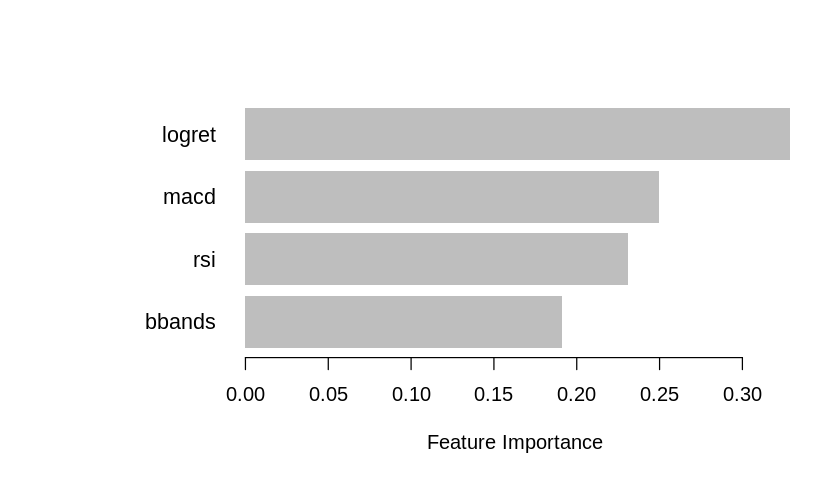

In [319]:
trainx <- calc.indi(n.rsi=40, n.bbands=16, n.macd=c(16,26,9))
ds <- get.dataset(trainx)

fc <- xgb.forecast(ds$x.train.label, ds$x.train.features, 
                   ds$x.test.label, ds$x.test.features,
                   max_depth=max_depth, eta=eta)

importance_matrix <- xgb.importance(model=fc$model)
importance_matrix <- importance_matrix[order(Feature),]

my.figsize(7, 4)
xgb.plot.importance(importance_matrix, xlab = "Feature Importance")
sum(importance_matrix[c(1,3,4),2])

### ALL

In [20]:
n.rsi <- c(30,35,40,45)
n.bbands <- c(8,12,16,20,24)
n.macd <- list(c(12,26,9), 
               c(12,30,9), 
               c(12,22,9), 
               c( 8,26,9), 
               c(16,26,9))

In [21]:
hg <- expand.grid(n.rsi=n.rsi, n.bbands=n.bbands, n.macd=n.macd)
nrow(hg)

[1] 100

In [326]:
hg[, 'ind.sum'] <- 0
for (i in 1:nrow(hg)) {
    trainx <- calc.indi(n.rsi=hg$n.rsi[i], 
                        n.bbands=hg$n.bbands[i], 
                        n.macd=hg$n.macd[[i]])
    ds <- get.dataset(trainx)

    fc <- xgb.forecast(ds$x.train.label, ds$x.train.features, 
                       ds$x.test.label, ds$x.test.features,
                       max_depth=max_depth, eta=eta)

    importance_matrix <- xgb.importance(model=fc$model)
    importance_matrix <- importance_matrix[order(Feature),]

    s <- sum(importance_matrix[c(1,3,4),2])
    message(paste('Importance Sum (i=', i, ') : ', round(s,3), sep=''))
    hg[i, 'ind.sum'] <- s
}

Importance Sum (i=1) : 0.689

Importance Sum (i=2) : 0.661

Importance Sum (i=3) : 0.627

Importance Sum (i=4) : 0.68

Importance Sum (i=5) : 0.698

Importance Sum (i=6) : 0.654

Importance Sum (i=7) : 0.674

Importance Sum (i=8) : 0.687

Importance Sum (i=9) : 0.679

Importance Sum (i=10) : 0.669

Importance Sum (i=11) : 0.667

Importance Sum (i=12) : 0.709

Importance Sum (i=13) : 0.701

Importance Sum (i=14) : 0.664

Importance Sum (i=15) : 0.678

Importance Sum (i=16) : 0.705

Importance Sum (i=17) : 0.675

Importance Sum (i=18) : 0.663

Importance Sum (i=19) : 0.667

Importance Sum (i=20) : 0.691

Importance Sum (i=21) : 0.707

Importance Sum (i=22) : 0.663

Importance Sum (i=23) : 0.648

Importance Sum (i=24) : 0.705

Importance Sum (i=25) : 0.701

Importance Sum (i=26) : 0.655

Importance Sum (i=27) : 0.662

Importance Sum (i=28) : 0.703

Importance Sum (i=29) : 0.689

Importance Sum (i=30) : 0.673

Importance Sum (i=31) : 0.68

Importance Sum (i=32) : 0.69

Importance Sum (i=33

In [331]:
hg[hg$ind.sum==max(hg$ind.sum),]

,n.rsi,n.bbands,n.macd,ind.sum
,<dbl>,<dbl>,<list>,<dbl>
72,45,16,"8, 26, 9",0.7207095


[1] 0.7207095

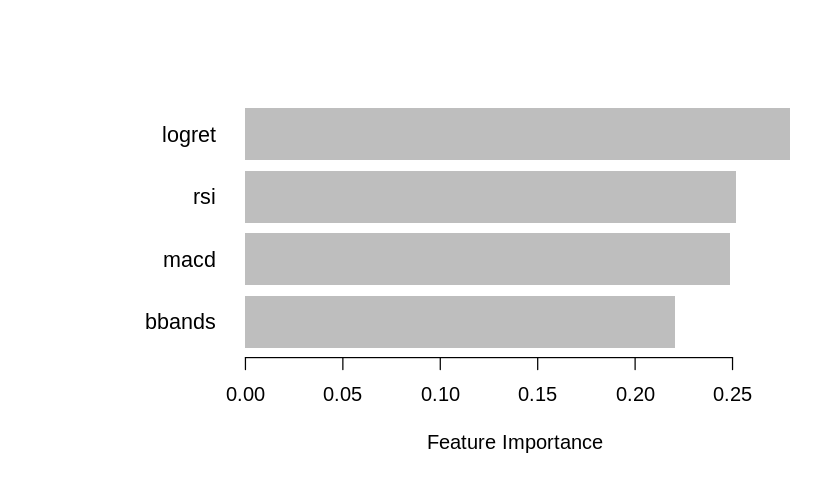

In [22]:
i <- 72
trainx <- calc.indi(n.rsi=hg$n.rsi[i], n.bbands=hg$n.bbands[i], n.macd=hg$n.macd[[i]])
ds <- get.dataset(trainx)

fc <- xgb.forecast(ds$x.train.label, ds$x.train.features, 
                   ds$x.test.label, ds$x.test.features,
                   max_depth=max_depth, eta=eta)

importance_matrix <- xgb.importance(model=fc$model)
importance_matrix <- importance_matrix[order(Feature),]

my.figsize(7, 4)
xgb.plot.importance(importance_matrix, xlab = "Feature Importance")
sum(importance_matrix[c(1,3,4),2])

In [23]:
importance_matrix

Feature,Gain,Cover,Frequency,Importance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
bbands,0.2202611,0.1732194,0.2036047,0.2202611
logret,0.2792905,0.3099205,0.2853040,0.2792905
macd,0.2485181,0.3473465,0.2699544,0.2485181
rsi,0.2519303,0.1695136,0.2411369,0.2519303


## TODO
- custom objetive for forecasting (not trading)
    - https://datascience.stackexchange.com/questions/81447/xgboost-custom-objective-for-regression-in-r
    - https://github.com/lbk209/gradient_boosting/blob/main/lib/objectives.py
- cv with new tech indi
- cv with more stock data

# Ex5. Optimize Tech. Indicators

## Settings

In [1]:
library(quantmod)
library(xgboost)

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
path <- '~/works/utils/r'
#path <- '~/works/ts/lib'
source(paste(path, "myutils.r", sep='/'))
source(paste(path, "myarimagarch.r", sep='/'))

In [3]:
source(paste(path, "myxgb.r", sep='/'))

In [4]:
calc.indi <- function(train, n.rsi=14, n.bbands=20, n.macd=c(12,26,9)) {
    x <- RSI(spx$a, n=n.rsi)
    trainx <- merge(train, x, join='left', fill=NA)

    # use close instead of adjusted to make consistent with "un-adjusted" high & low
    x <- BBands(spx[,c('h','l','c')], n=n.bbands)
    x <- x$pctB
    trainx <- merge(trainx, x, join='left', fill=NA)

    x <- MACD(spx$a, nFast = n.macd[1], nSlow = n.macd[2], nSig = n.macd[3])
    x <- x$macd - x$signal
    trainx <- merge(trainx, x, join='left', fill=NA)

    colnames(trainx) <- c('y','rsi','bbands','macd')
    trainx <- na.omit(trainx)
    return(trainx)
}


get.dataset <- function(trainx, lookahead) {
    train.ml <- merge(lag.xts(trainx$y, -lookahead), trainx, join='left', fill=NA)
    colnames(train.ml) <- c('logret_fwd', 'logret', 'rsi','bbands','macd')
    train.ml <- na.omit(train.ml)
    ds <- list(label=train.ml[,1], features=train.ml[,2:5])
    return(ds)
}

In [5]:
xgb.tsCV.2 <- function(label, features, max_depth = 6, eta = .25,
                      h = 1, window = NULL, initial = 0, step = 1, 
                      count.freq=0.1, ...) 
{
    y <- as.ts(label)
    n <- length(y)
    step <- round(step)
    step_ind <- seq(step, n - 1L, by = step)

    if (initial >= n) 
        stop("initial period too long")

    xreg <- ts(as.matrix(features))
    if (NROW(xreg) != length(y)) 
        stop("features must be of the same size as label")
    tsp(xreg) <- tsp(y)
 
    if (is.null(window)) {
        indx <- seq(1 + initial, n - 1L)
    } else {
        indx <- seq(window + initial, n - 1L, by = 1L)
    }
    indx <- intersect(indx, step_ind)

    e.cols <- c('forecast_start', 'forecast_end')
    e.cols <- append(e.cols, sort(colnames(features)))
    e <- ts(matrix(NA_real_, nrow = floor(n/step), ncol = length(e.cols)))
    colnames(e) <- e.cols
    
    ###
    hyper_grid <- expand.grid(max_depth = max_depth, eta = eta)
    if (nrow(hyper_grid)>1) {
        hyper_grid.flag <- TRUE
        h.gsearch <- max(h, step)
    } else {
        hyper_grid.flag <- FALSE
    }
    

    indx.len <- length(indx)
    by <- round(count.freq*indx.len)
    by <- max(1, by)
    print.when <- seq(0, indx.len, by=by)
    
    cnt <- 0
    
    for (i in indx) {
        # get new start of subset of y & xreg
        if (is.null(window)) {
            start <- 1L
        } else {
            if (i - window >= 0L) {
                start <- i - window + 1L
            } else {
                stop("small window")
            }
        }
        train.label <- subset(y, start=start, end = i)
        train.features <- as.matrix(subset(xreg, start=start, end=i))
        
        # get test data
        start <- i+1
        end <- i+h
        if (end <= nrow(xreg)) {
            test.label <- subset(y, start=start, end=end)
            test.features <- as.matrix(subset(xreg, start=start, end=end))
        } else {
            next
        }
        
        # tune hyperparams
        if (hyper_grid.flag) {
            res <- xgb.gridsearch(train.label, train.features, 
                                  h.gsearch, 
                                  hyper_grid)
            max_depth.best <- res$max_depth
            eta.best <- res$eta
        } else {
            max_depth.best <- max_depth
            eta.best <- eta
        }
        
        # train model
        fc <- xgb.forecast(train.label, train.features, test.label, test.features,
                                nrounds = 1000, early_stopping_rounds = 3,
                                max_depth = max_depth.best,
                                eta = eta.best, result.error=FALSE, ...)
        # calc importance
        importance_matrix <- xgb.importance(model=fc$model)
        importance_matrix <- importance_matrix[order(Feature),]
        gains <- importance_matrix[,'Gain']
        gains <- as.list(gains)
        gains <- gains$Gain

        e[i/step, ] <- append(c(start, end), gains)

        cnt <- cnt + 1
        if (cnt %in% print.when) {
            message(sprintf("%0.0f %% done.", 100*cnt/length(indx)))
        }
    }
    #return(na.omit(e)) # times of NA kept in e as attr(na.action)
    return(e)
}

## Data

In [6]:
train_start <- '1991-01-01'
train_end <- '2019-12-31'

test_start <- '2020-01-01'
test_end <- '2020-12-31'

In [80]:
# testing
#train_start <- '1991-01-01'
#train_end <- '2000-12-31'

In [7]:
from <- train_start
to <- test_end
getSymbols("^GSPC", from=from, to=to)

[1] "^GSPC"

In [8]:
spx <- GSPC
colnames(spx) <- c('o','h','l','c','v','a')

### Return

In [9]:
lookahead <- 21

In [10]:
spx.ret <- diff(log(spx$a), lookahead)
spx.ret <- na.omit(spx.ret)
colnames(spx.ret) <- 'logret'
head(spx.ret)

               logret
1991-01-31 0.05216129
1991-02-01 0.06360416
1991-02-04 0.08173788
1991-02-05 0.10755822
1991-02-06 0.12847341
1991-02-07 0.13502311

In [11]:
train <- window(spx.ret, end=as.Date(train_end))
test <- window(spx.ret, start=as.Date(test_start), end=as.Date(test_end))

### CV Settings

In [12]:
YEAR <- 252

#hori <- floor(YEAR/2)
#hori <- floor(YEAR/6)
hori <- floor(YEAR/12)

#peri <- floor(hori/2)
#peri <- hori*2
peri <- hori

#wind <- 5*YEAR
#wind <- 7*YEAR
wind <- 9*YEAR

## CV

In [13]:
n.rsi <- c(10,14,18,22) # default 14
n.bbands <- c(16,20,24,28) # default 20
n.macd <- list(c(12,26,9)) # default

In [14]:
hg <- expand.grid(n.rsi=n.rsi, n.bbands=n.bbands, n.macd=n.macd)
nrow(hg)

[1] 16

In [16]:
#max_depth <- seq(4, 8, 1)
#eta <- c(0.01, 0.05, 0.1, 0.2, 0.3)

max_depth <- 6
eta <- .25

In [17]:
result <- NULL

for (i in 1:nrow(hg)) {
    trainx <- calc.indi(train,
                        n.rsi=hg$n.rsi[i], 
                        n.bbands=hg$n.bbands[i], 
                        n.macd=hg$n.macd[[i]])
    ds <- get.dataset(trainx, lookahead)

    imp <- xgb.tsCV.2(ds$label, ds$features, 
                     h=hori, window=wind, step=peri,
                     max_depth = max_depth, eta = eta,
                     count.freq=0.5)
    imp <- na.omit(imp)
    imp <- data.frame(imp)
    res <- cbind(imp, hg[i,], row.names = NULL)
    if (is.null(result)) {
        result <- res
    } else {
        result <- rbind(result, res)
    }
    message(sprintf("Indi Opt: %0.0f %% done.", 100*i/nrow(hg)))
}

50 % done.

Indi Opt: 6 % done.

50 % done.

Indi Opt: 12 % done.

50 % done.

Indi Opt: 19 % done.

50 % done.

Indi Opt: 25 % done.

50 % done.

Indi Opt: 31 % done.

50 % done.

Indi Opt: 38 % done.

50 % done.

Indi Opt: 44 % done.

50 % done.

Indi Opt: 50 % done.

50 % done.

Indi Opt: 56 % done.

50 % done.

Indi Opt: 62 % done.

50 % done.

Indi Opt: 69 % done.

50 % done.

Indi Opt: 75 % done.

50 % done.

Indi Opt: 81 % done.

50 % done.

Indi Opt: 88 % done.

50 % done.

Indi Opt: 94 % done.

50 % done.

Indi Opt: 100 % done.



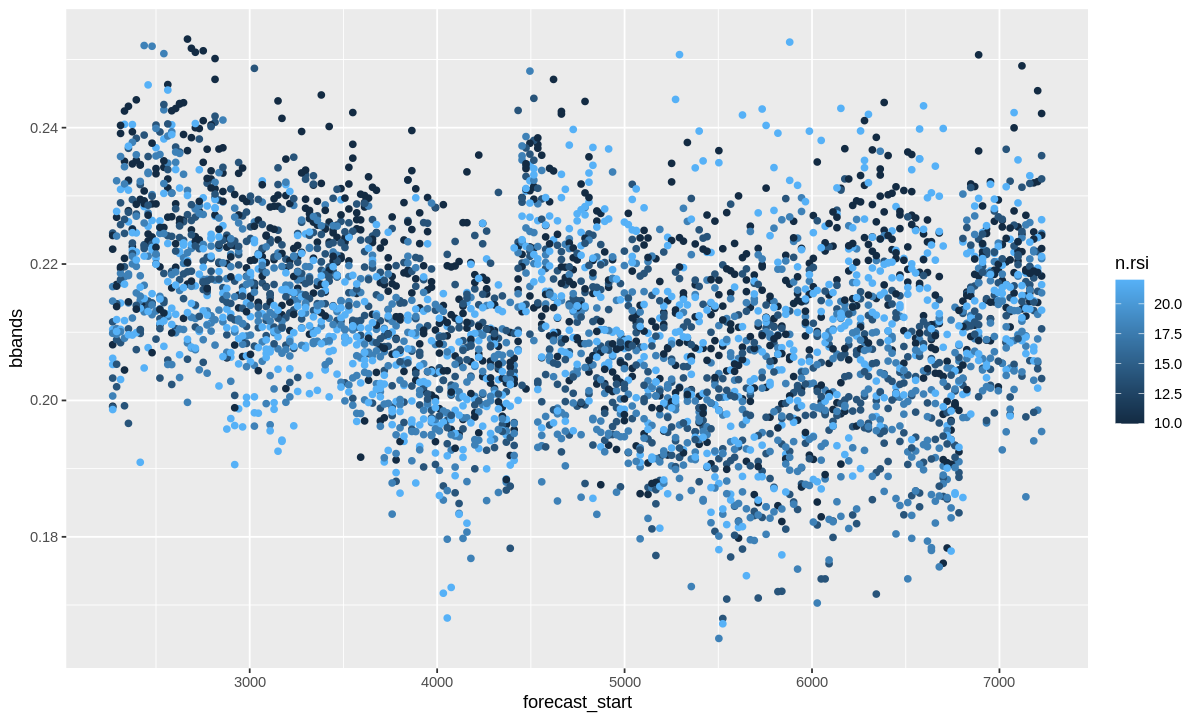

In [20]:
my.figsize(10,6)
(ggplot(result, aes(x=forecast_start, y=bbands, group=n.rsi)) 
 #+ geom_line(aes(col=n.rsi))
 + geom_point(aes(col=n.rsi))
)

In [19]:
head(result)

,forecast_start,forecast_end,bbands,logret,macd,rsi,n.rsi,n.bbands,n.macd
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<list>
1,2269,2289,0.2081678,0.2737822,0.2891770,0.2288729,10,16,"12, 26, 9"
2,2290,2310,0.2170020,0.3049878,0.2669555,0.2110547,10,16,"12, 26, 9"
3,2311,2331,0.2193480,0.2670066,0.2955382,0.2181072,10,16,"12, 26, 9"
4,2332,2352,0.2044572,0.2920891,0.2845413,0.2189125,10,16,"12, 26, 9"
5,2353,2373,0.2278240,0.2737466,0.2848672,0.2135622,10,16,"12, 26, 9"
6,2374,2394,0.2225411,0.2639154,0.2873937,0.2261499,10,16,"12, 26, 9"


In [31]:
result[which.max(rowSums(result[,c('bbands','macd','rsi')])),]

,forecast_start,forecast_end,bbands,logret,macd,rsi,n.rsi,n.bbands,n.macd
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<list>
3542,6952,6972,0.2175522,0.2393389,0.2430098,0.300099,18,28,"12, 26, 9"


In [36]:
x <- result
x[,'n.macd'] <- as.character(x[,'n.macd'])
write.csv(x, file = "result_indi_opt_ex5.csv")

# Ex6. Comparison of default & optimized tech indicators

## Settings

In [41]:
library(quantmod)
library(xgboost)

In [43]:
#path <- '~/works/utils/r'
path <- '~/works/ts/lib'
source(paste(path, "myutils.r", sep='/'))
source(paste(path, "myarimagarch.r", sep='/'))

In [44]:
source(paste(path, "myxgb.r", sep='/'))

In [45]:
new.get_result <- function(x, group, group.col='Models',
                          errors=c('rmse','mape') # unconditional forecast
                          #errors=c('rmse.mean','mape.mean') # daily forecast
                          ) {
    y <- my.get_result(x, group, errors=errors, group.col=group.col)
    colnames(y) <- c('rmse','mape',group.col)
    return(y)
}


new.plot_errors <- function(x, group.col='Models', ...) {
    my.plot_errors(x, metrics=c('rmse'), group.col=group.col, ...)
}

In [46]:
calc.indi <- function(train, n.rsi=14, n.bbands=20, n.macd=c(12,26,9)) {
    x <- RSI(spx$a, n=n.rsi)
    trainx <- merge(train, x, join='left', fill=NA)

    # use close instead of adjusted to make consistent with "un-adjusted" high & low
    x <- BBands(spx[,c('h','l','c')], n=n.bbands)
    x <- x$pctB
    trainx <- merge(trainx, x, join='left', fill=NA)

    x <- MACD(spx$a, nFast = n.macd[1], nSlow = n.macd[2], nSig = n.macd[3])
    x <- x$macd - x$signal
    trainx <- merge(trainx, x, join='left', fill=NA)

    colnames(trainx) <- c('y','rsi','bbands','macd')
    trainx <- na.omit(trainx)
    return(trainx)
}


get.dataset <- function(trainx, lookahead) {
    train.ml <- merge(lag.xts(trainx$y, -lookahead), trainx, join='left', fill=NA)
    colnames(train.ml) <- c('logret_fwd', 'logret', 'rsi','bbands','macd')
    train.ml <- na.omit(train.ml)
    ds <- list(label=train.ml[,1], features=train.ml[,2:5])
    return(ds)
}

## Data

In [47]:
train_start <- '1991-01-01'
train_end <- '2019-12-31'

test_start <- '2020-01-01'
test_end <- '2020-12-31'

In [48]:
# testing
#train_start <- '1991-01-01'
#train_end <- '2000-12-31'

In [49]:
from <- train_start
to <- test_end
getSymbols("^GSPC", from=from, to=to)

[1] "^GSPC"

In [50]:
spx <- GSPC
colnames(spx) <- c('o','h','l','c','v','a')

### Return

In [51]:
lookahead <- 21

In [52]:
spx.ret <- diff(log(spx$a), lookahead)
spx.ret <- na.omit(spx.ret)
colnames(spx.ret) <- 'logret'
head(spx.ret)

               logret
1991-01-31 0.05216129
1991-02-01 0.06360416
1991-02-04 0.08173788
1991-02-05 0.10755822
1991-02-06 0.12847341
1991-02-07 0.13502311

In [53]:
train <- window(spx.ret, end=as.Date(train_end))
test <- window(spx.ret, start=as.Date(test_start), end=as.Date(test_end))

### CV Settings

In [54]:
YEAR <- 252

#hori <- floor(YEAR/2)
#hori <- floor(YEAR/6)
hori <- floor(YEAR/12)

#peri <- floor(hori/2)
#peri <- hori*2
peri <- hori

#wind <- 5*YEAR
#wind <- 7*YEAR
wind <- 9*YEAR

In [55]:
max_depth <- seq(4, 8, 1)
eta <- c(0.01, 0.05, 0.1, 0.2, 0.3)

## Default

In [56]:
trainx <- calc.indi(train)
ds <- get.dataset(trainx, lookahead)

In [57]:
result1 <- xgb.tsCV.mean(ds$label, ds$features, 
                              h=1, window=wind, step=peri,
                              max_depth=max_depth, eta=eta)

   max_depth eta
21         4 0.3


10 % done.



   max_depth eta
11         4 0.1


20 % done.



   max_depth eta
15         8 0.1


30 % done.



   max_depth eta
21         4 0.3


40 % done.



  max_depth  eta
1         4 0.01


50 % done.



  max_depth  eta
5         8 0.01


60 % done.



   max_depth eta
18         6 0.2


70 % done.



   max_depth eta
18         6 0.2


80 % done.



  max_depth  eta
1         4 0.01


90 % done.



   max_depth eta
23         6 0.3


100 % done.



## Opt Tech Indicators

### get opt indi

In [3]:
n.rsi <- c(10,14,18,22) # default 14
n.bbands <- c(16,20,24,28) # default 20
n.macd <- c(12,26,9) # default

In [4]:
hg <- expand.grid(n.rsi=n.rsi, n.bbands=n.bbands, n.macd=n.macd)
nrow(hg)

[1] 48

In [326]:
hg[, 'ind.sum'] <- 0
for (i in 1:nrow(hg)) {
    trainx <- calc.indi(train,
                        n.rsi=hg$n.rsi[i], 
                        n.bbands=hg$n.bbands[i], 
                        n.macd=hg$n.macd[[i]])
    ds <- get.dataset(trainx, lookahead)

    fc <- xgb.forecast(ds$x.train.label, ds$x.train.features, 
                       ds$x.test.label, ds$x.test.features,
                       max_depth=max_depth, eta=eta)

    importance_matrix <- xgb.importance(model=fc$model)
    importance_matrix <- importance_matrix[order(Feature),]

    s <- sum(importance_matrix[c(1,3,4),2])
    message(paste('Importance Sum (i=', i, ') : ', round(s,3), sep=''))
    hg[i, 'ind.sum'] <- s
}

Importance Sum (i=1) : 0.689

Importance Sum (i=2) : 0.661

Importance Sum (i=3) : 0.627

Importance Sum (i=4) : 0.68

Importance Sum (i=5) : 0.698

Importance Sum (i=6) : 0.654

Importance Sum (i=7) : 0.674

Importance Sum (i=8) : 0.687

Importance Sum (i=9) : 0.679

Importance Sum (i=10) : 0.669

Importance Sum (i=11) : 0.667

Importance Sum (i=12) : 0.709

Importance Sum (i=13) : 0.701

Importance Sum (i=14) : 0.664

Importance Sum (i=15) : 0.678

Importance Sum (i=16) : 0.705

Importance Sum (i=17) : 0.675

Importance Sum (i=18) : 0.663

Importance Sum (i=19) : 0.667

Importance Sum (i=20) : 0.691

Importance Sum (i=21) : 0.707

Importance Sum (i=22) : 0.663

Importance Sum (i=23) : 0.648

Importance Sum (i=24) : 0.705

Importance Sum (i=25) : 0.701

Importance Sum (i=26) : 0.655

Importance Sum (i=27) : 0.662

Importance Sum (i=28) : 0.703

Importance Sum (i=29) : 0.689

Importance Sum (i=30) : 0.673

Importance Sum (i=31) : 0.68

Importance Sum (i=32) : 0.69

Importance Sum (i=33

In [331]:
hg.opt <- hg[hg$ind.sum==max(hg$ind.sum),]

,n.rsi,n.bbands,n.macd,ind.sum
,<dbl>,<dbl>,<list>,<dbl>
72,45,16,"8, 26, 9",0.7207095


In [58]:
n.rsi <- hg.opt$n.rsi
n.bbands <- hg.opt$n.bbands
n.macd <- hg.opt$n.macd

trainx <- calc.indi(train, n.rsi, n.bbands, n.macd)
ds <- get.dataset(trainx, lookahead)

In [59]:
result2 <- xgb.tsCV.mean(ds$label, ds$features, 
                              h=1, window=wind, step=peri,
                              max_depth=max_depth, eta=eta)

   max_depth eta
24         7 0.3


10 % done.



   max_depth eta
21         4 0.3


20 % done.



   max_depth eta
13         6 0.1


30 % done.



  max_depth  eta
1         4 0.01


40 % done.



   max_depth eta
22         5 0.3


50 % done.



   max_depth eta
24         7 0.3


60 % done.



  max_depth  eta
5         8 0.01


70 % done.



   max_depth eta
12         5 0.1


80 % done.



  max_depth  eta
1         4 0.01


90 % done.



  max_depth  eta
1         4 0.01


100 % done.



## Compare

In [60]:
my.figsize(10,6)

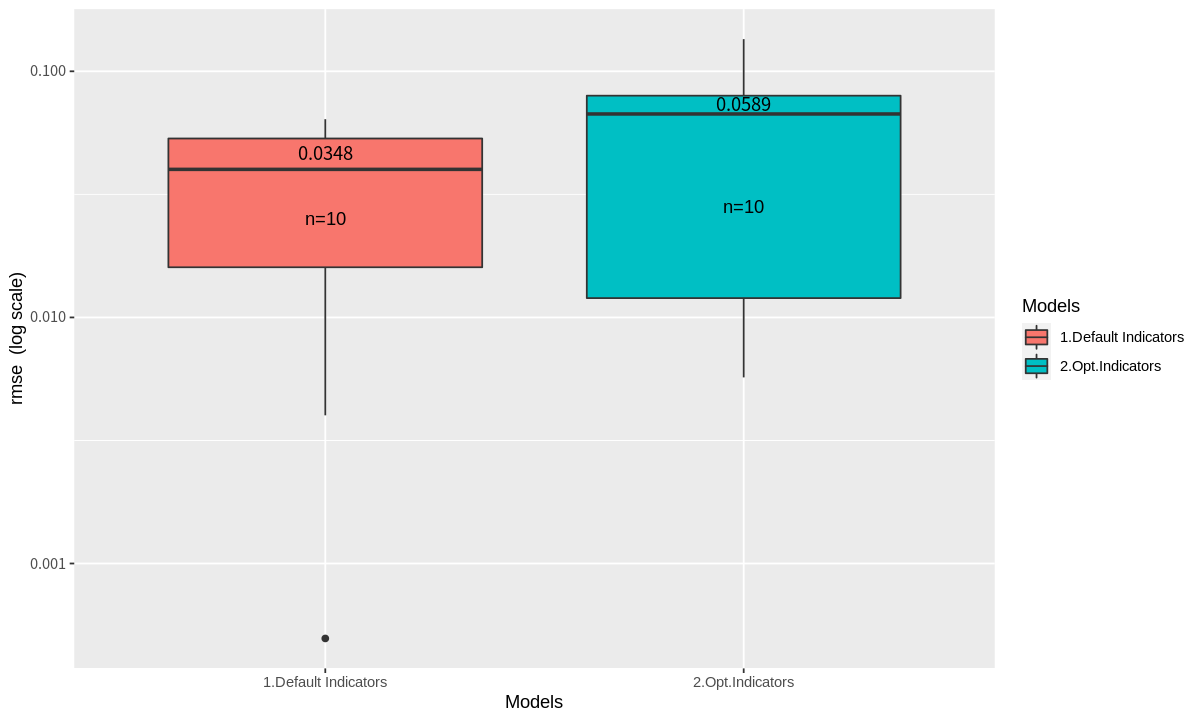

In [61]:
errors.1 <- new.get_result(result1, '1.Default Indicators')
errors.2 <- new.get_result(result2, '2.Opt.Indicators')

x <- errors.1
x <- rbind(x, errors.2)

new.plot_errors(x, ylog=T)

### save result

In [73]:
x <- result.m05.1
write.csv(x, file = "gbm_result_m0501.csv")
x <- result.m05.2
write.csv(x, file = "gbm_result_m0502.csv")

### load result

In [32]:
result.m05.1 <- read.csv(file = 'gbm_result_m0501.csv')
result.m05.2 <- read.csv(file = 'gbm_result_m0502.csv')